(RM03)=
# RM03

Consider the following constrained optimization problem:

$$
\begin{array}{lll}
\textrm{minimize}   & f(x_1, x_2)     &= x_1 + x_2 & \\
\textrm{subject to} & g_{1}(x_1, x_2) &= (x_1 - 1)^2 + {x_2}^2 - 1 &= 0, \\
                    & g_{2}(x_1, x_2) &= (x_1 - 2)^2 + {x_2}^2 - 4 &= 0, \\
\end{array}
$$

with

$$
\nabla     f(x_1, x_2) = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, \quad
\nabla g_{1}(x_1, x_2) = \nabla g_{2}(x_1, x_2)
= \begin{pmatrix} 2(x_1 - 1) \\ 2 x_2 \end{pmatrix}.
$$

The optimal point is
$\begin{pmatrix} {x_1}^{*} \\ {x_2}^{*} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$
with $f({x_1}^{*}, {x_2}^{*}) = 0$.

However,
because $\nabla g_{1}(x_1, x_2) = \nabla g_{2}(x_1, x_2)$
are not linear independent,
the regularity constraint qualification (LICQ) is violated.
The KKT conditions cannot be satisfied.

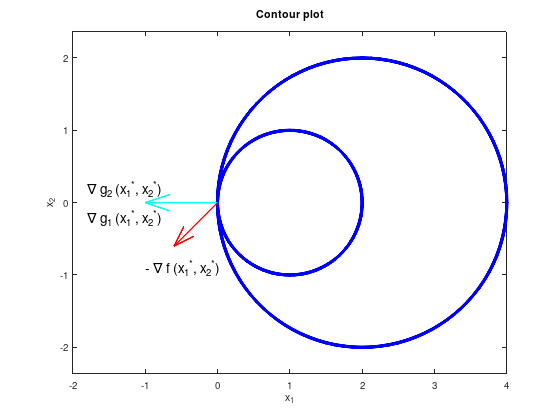

In [16]:
% Optimal point.
px = 0;
py = 0;

function circle (x, y, r)
  t = 0:(pi / 50):2*pi;
  x = r * cos (t) + x;
  y = r * sin (t) + y;
  plot (x, y, 'b', 'LineWidth', 4);
end

% Visualize constrained set of feasible solutions (blue).
circle (1, 0, 1);
hold on;
circle (2, 0, 2);

% Visualize scaled gradients of objective function (red arrow)
% and constraint functions (cyan arrows).
quiver (px, py, -1,    0,   'LineWidth', 2, 'c');
quiver (px, py, -0.6, -0.6, 'LineWidth', 2, 'r');
text (-1.0, -0.9, '- \nabla f ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
text (-1.8,  0.2, '\nabla g_2 ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
text (-1.8, -0.2, '\nabla g_1 ({x_1}^{*}, {x_2}^{*})', 'FontSize', 14);
axis equal;
xlim ([-2 4]);
xlabel ('x_1');
ylabel ('x_2');
title ('Contour plot');

## Numerical experiment (only Matlab)

In [ ]:
function RM03()
  % Nonlinear objective function.
  fun = @(x) x(1) + x(2);

  % Starting point.
  x0 = [0, 0];

  % Linear inequality constraints A * x <= b.
  A = [];
  b = [];

  % Linear equality constraints Aeq * x = beq.
  Aeq = [];
  beq = [];

  % Bounds lb <= x <= ub
  lb = [];
  ub = [];

  % Call solver.
  [x,fval,exitflag,output,lambda,grad,hessian] = fmincon (fun,x0,A,b,Aeq,beq,lb,ub,@nonlcon);
  
  % Display interesting details.
  
  exitflag  % == 1 success
  output
  x         % optimal solution
  fval      % function value at optimal solution
  grad      % gradient of fun at optimal solution
  hessian   % Hessian matrix of fun at optimal solution
  lambda    % Lagrange parameter
  lambda.eqnonlin  % lambda_1 and lambda_2
  
  disp ('"="-Constraints')
  [(x(1) - 1).^2 + x(2).^2 - 1; ...
   (x(1) - 2).^2 + x(2).^2 - 4]
end

% Nonlinear constraint function for g_1.
function [c,ceq] = nonlcon(x)
  c = 0;
  ceq = [(x(1) - 1).^2 + x(2).^2 - 1; ...
         (x(1) - 2).^2 + x(2).^2 - 4];
end